<a href="https://colab.research.google.com/github/sspaulc/TED_TALKS_VIEWS_PREDICTION/blob/main/Sanchita_Ted_Talks_Views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement-- TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np

import pandas as pd

In [4]:
#Read the data

data= pd.read_csv("/content/gdrive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/Ted Talk Views Prediction/data_ted_talks.csv")


Before we can do any EDA let us take a look at what is happening in the data first.

In [5]:
data.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [6]:
import seaborn as sns

Looking for nan values:

In [7]:
import missingno as msno

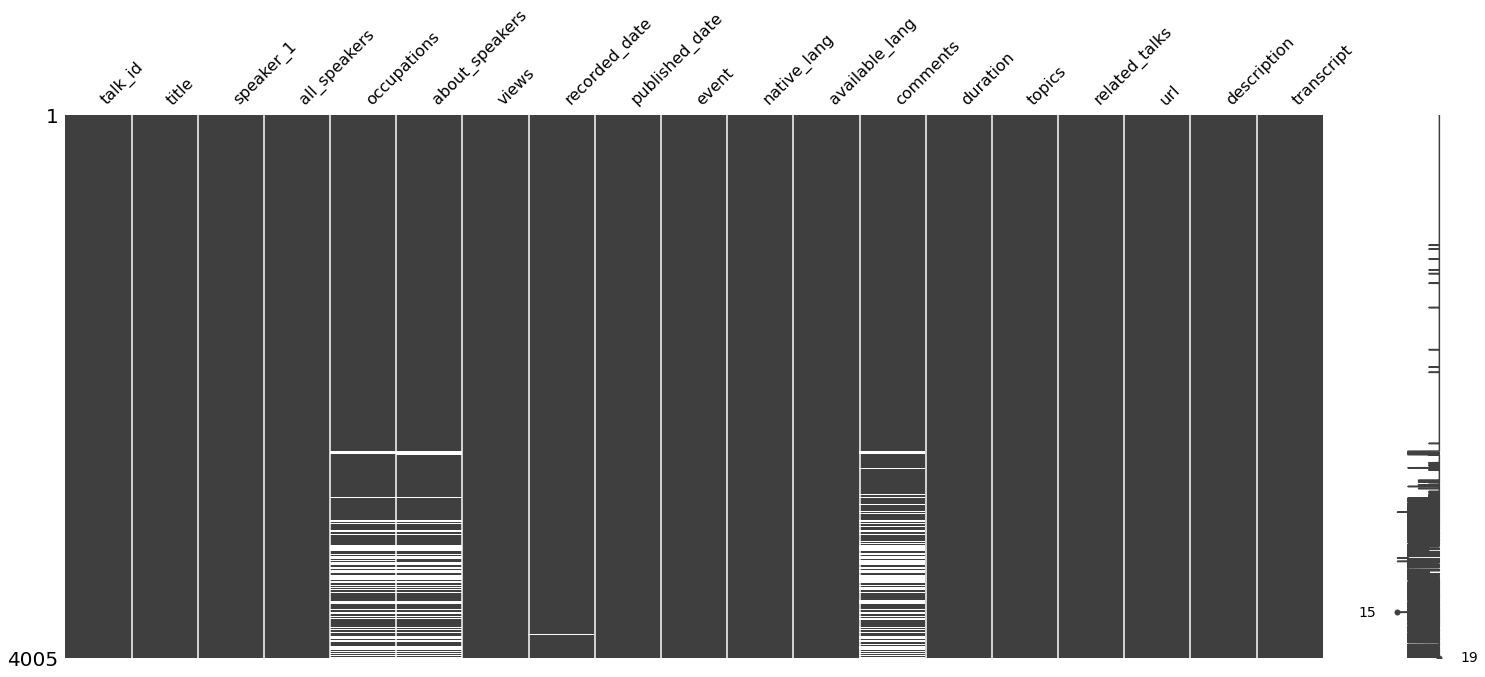

In [8]:
msno.matrix(data)

# Let us take a look at the distribution of dependent variable:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


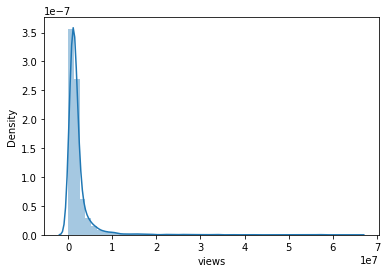

In [9]:
sns.distplot(data['views'])

In [10]:
data['views'].max()

65051954

There are also positvie and negative infinity values on views. Converting them to maximum and nan respectively.

In [11]:
def float_to_int(x):
    if x == float('-inf'):
        return -1
    elif x== float('inf'):
      return x.max()
    return int(x)

In [12]:
data['views']=data['views'].apply(float_to_int)

## We can remove the id because it isn't adding any value to the regression performance.

In [13]:
data.drop(columns='talk_id',inplace= True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4001 non-null   object 
 3   occupations     3483 non-null   object 
 4   about_speakers  3502 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4004 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        3350 non-null   float64
 12  duration        4005 non-null   int64  
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

# Imputing the Nan values :

##Numerical-- KNN nan value imputer

Datasets may have missing values, and this can cause problems for many machine learning algorithms.

As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.

A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation.”

In [15]:
numerical_features= ['duration','comments']

In [16]:
#Import libraries
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer()

#fitting the model
imputer.fit(data[numerical_features])

# transform the dataset
data[numerical_features] = imputer.transform(data[numerical_features])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4001 non-null   object 
 3   occupations     3483 non-null   object 
 4   about_speakers  3502 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4004 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        4005 non-null   float64
 12  duration        4005 non-null   float64
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

All the nan values for numerical features is removed.

## Categorical features-- nan values are labelled as 'Unkwown'





In [18]:
#categorical features 

categorical_features= ['title','speaker_1','all_speakers','event','native_lang','available_lang','topics','related_talks','url','description','transcript','occupations','about_speakers']

In [19]:
data[categorical_features]=data[categorical_features].fillna('Unknown')

The Recorded date is having null date but in string format. I would like to replace it with first value.

In [20]:
#First value

data['recorded_date'][0]

'2006-02-25'

In [21]:
data['recorded_date']=data['recorded_date'].fillna('2006-02-25')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4005 non-null   object 
 3   occupations     4005 non-null   object 
 4   about_speakers  4005 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4005 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        4005 non-null   float64
 12  duration        4005 non-null   float64
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

## I have taken care of all null values.

#Extensive analysis on each of the features.

## I wanna take a look at what are the year,months and days that most of these ted talks have taken place.

### First for the published dates: get the time stamps.

In [23]:
import time

In [24]:
import datetime

In [25]:
data['published_date'] = data['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [26]:
data['published_day'] = data['published_date'].apply(lambda x: x.weekday())
data['published_month'] = data['published_date'].apply(lambda x: x.month)
data['published_year'] = data['published_date'].apply(lambda x: x.year)

## For the recorded date now:

In [27]:
data['recorded_date'] = data['recorded_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [28]:
data['recorded_day'] = data['recorded_date'].apply(lambda x: x.weekday())
data['recorded_month'] = data['recorded_date'].apply(lambda x: x.month)
data['recorded_year'] = data['recorded_date'].apply(lambda x: x.year)

## I also want to keep the number of days it takes between recording and publishing.

In [29]:
data['diff_record_publish']= data['published_date']- data['recorded_date']

In [30]:
data['diff_record_publish'] = pd.to_numeric(data['diff_record_publish'].dt.days, downcast='integer')

## Age of the video:

In [31]:
current_date= datetime.datetime(2021,5,18)

In [32]:
data['age_of_video']= current_date.year- data['published_year']

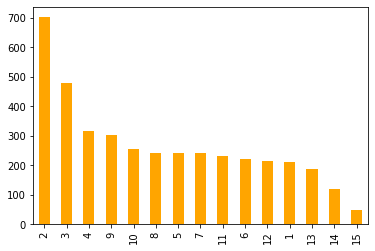

In [33]:
#Plotting the age of most videos

data['age_of_video'].value_counts().sort_values(ascending=False).plot(kind='bar', color= 'orange')

Determining the relationship of age of video with the views:

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                4005 non-null   object        
 1   speaker_1            4005 non-null   object        
 2   all_speakers         4005 non-null   object        
 3   occupations          4005 non-null   object        
 4   about_speakers       4005 non-null   object        
 5   views                4005 non-null   int64         
 6   recorded_date        4005 non-null   datetime64[ns]
 7   published_date       4005 non-null   datetime64[ns]
 8   event                4005 non-null   object        
 9   native_lang          4005 non-null   object        
 10  available_lang       4005 non-null   object        
 11  comments             4005 non-null   float64       
 12  duration             4005 non-null   float64       
 13  topics               4005 non-nul

In [35]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Number of days between recording and publishing')

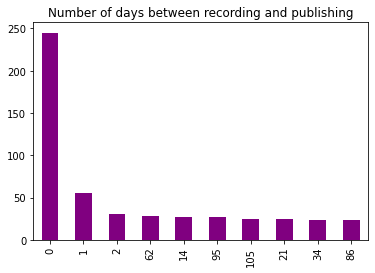

In [36]:
#plotting these to get a better idea

data['diff_record_publish'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='purple')

plt.title('Number of days between recording and publishing')

# Find the dependence of views on the difference in recorded and published days:

In [37]:
import seaborn as sns

In [38]:
# I want to view it difference in days and views in a scaled manner

from sklearn.preprocessing import MinMaxScaler


In [39]:
data['diff_record_publish'] = MinMaxScaler().fit_transform(np.array(data['diff_record_publish']).reshape(-1,1))

In [40]:
data['views'] = MinMaxScaler().fit_transform(np.array(data['views']).reshape(-1,1))

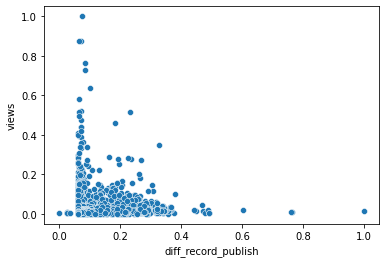

In [41]:
sns.scatterplot(x= data['diff_record_publish'], y=data['views'])

In [42]:
data.head(3)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year,recorded_day,recorded_month,recorded_year,diff_record_publish,age_of_video
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,0.054163,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,6,2006,5,2,2006,0.074611,15
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",0.222925,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1,6,2006,2,2,2006,0.074931,15
2,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,0.029528,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1,6,2006,4,2,2006,0.074718,15


Also Scaling the other numerical columns:

In [43]:
data['comments'] = MinMaxScaler().fit_transform(np.array(data['comments']).reshape(-1,1))

In [44]:
data['duration']= MinMaxScaler().fit_transform(np.array(data['duration']).reshape(-1,1))

In [45]:
data.head(1)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year,recorded_day,recorded_month,recorded_year,diff_record_publish,age_of_video
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,0.054163,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",0.042177,0.237442,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,6,2006,5,2,2006,0.074611,15


## The videos are usually published within a span of 3 months

## I want to determine the most popular days,months and year of publishing:

## Looking for the most popular days for the publishing views.

In [46]:
import matplotlib.pyplot as plt


In [47]:
data['published_day']=data['published_day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

Text(0.5, 1.0, 'Published Days')

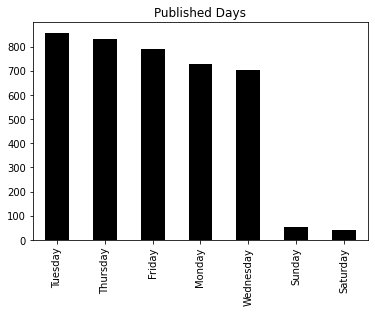

In [48]:
data['published_day'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Published Days')

## Frequency encoding:

In [49]:

#Frequency encoiding

enc_nom_1 = (data.groupby('published_day').size()) / len(data)

data['published_day_encode'] = data['published_day'].apply(lambda x : enc_nom_1[x])

In [50]:
data.drop(columns='published_day',inplace= True)


## Most published months:

In [51]:
data['published_month']=data['published_month'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Text(0.5, 1.0, 'Published Months')

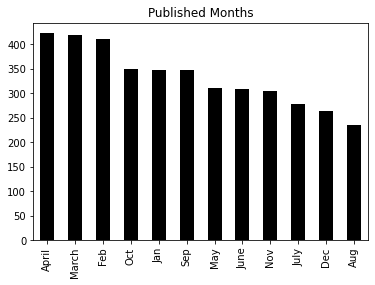

In [52]:
data['published_month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Published Months')

In [53]:
#Frequency encoiding

enc_nom_1 = (data.groupby('published_month').size()) / len(data)

data['published_month_encode'] = data['published_month'].apply(lambda x : enc_nom_1[x])

In [54]:
data.drop(columns='published_month',inplace= True)

## Most published year:

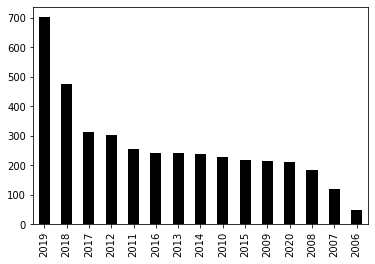

In [55]:
data['published_year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

# Most popular recorded day, month and year:

## Recorded days distribution:

In [56]:
data['recorded_day']=data['recorded_day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

Text(0.5, 1.0, 'Recorded Days')

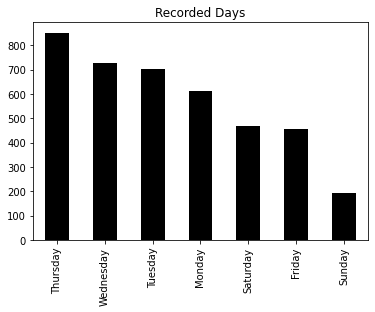

In [57]:
data['recorded_day'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Recorded Days')

## Frequency encoding :

In [58]:
#Frequency encoiding

enc_nom_1 = (data.groupby('recorded_day').size()) / len(data)

data['recorded_day_encode'] = data['recorded_day'].apply(lambda x : enc_nom_1[x])

In [59]:
data.drop(columns= 'recorded_day',inplace= True)

## Monthly Recorded distribution:

In [60]:
data['recorded_month']=data['recorded_month'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Text(0.5, 1.0, 'Recorded Months')

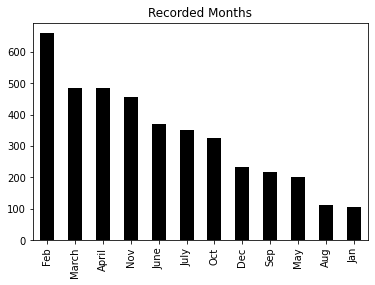

In [61]:
data['recorded_month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Recorded Months')

## Frequency encoding:

In [62]:
#Frequency encoiding

enc_nom_1 = (data.groupby('recorded_month').size()) / len(data)

data['recorded_month_encode'] = data['recorded_month'].apply(lambda x : enc_nom_1[x])

In [63]:
data.drop(columns= 'recorded_month',inplace= True)

## Most recorded year:

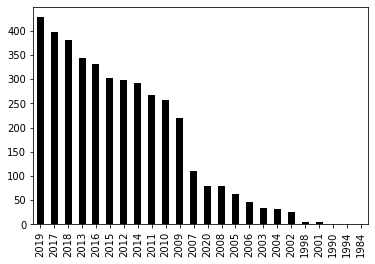

In [64]:
data['recorded_year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

# We can drop the following columns:

1.  URL- we aren't doing any SEO so doesn't seem important

2. published and recorded date- we have already taken care of these non numerical columns.

In [65]:
data.drop(columns=['url','recorded_date','published_date'],inplace=True)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   4005 non-null   object 
 1   speaker_1               4005 non-null   object 
 2   all_speakers            4005 non-null   object 
 3   occupations             4005 non-null   object 
 4   about_speakers          4005 non-null   object 
 5   views                   4005 non-null   float64
 6   event                   4005 non-null   object 
 7   native_lang             4005 non-null   object 
 8   available_lang          4005 non-null   object 
 9   comments                4005 non-null   float64
 10  duration                4005 non-null   float64
 11  topics                  4005 non-null   object 
 12  related_talks           4005 non-null   object 
 13  description             4005 non-null   object 
 14  transcript              4005 non-null   

# Number of languages: 

First convert the string to list:

In [67]:
#Function to use eval function to convert string to list.
def convert_string_to_original_dtype(x):
  return eval(x)

In [68]:
data['available_lang']= data['available_lang'].apply(convert_string_to_original_dtype)

Create another feature that has the count of these languages:

In [69]:
#Function to calculate the count of languages

def length(x):
  return len(x)

In [70]:
data['count_available_lang']= data['available_lang'].apply(length)

Let us see the distribution now:

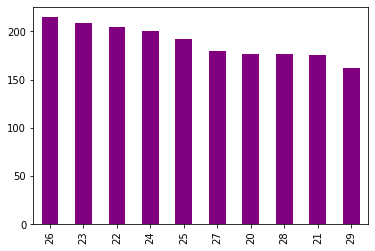

In [71]:
#Distribution of the top 10 counts of languages

data['count_available_lang'].value_counts().sort_values(ascending= False).head(10).plot(kind= 'bar',color= 'purple')


Most ted talks are available in 20-30 languages.

Now that I have the count of languages in a numerical format, I can drop the available languages column.

In [72]:
#dropping the available languages

data.drop(columns='available_lang',inplace= True)

## Native Languages:

In [73]:
#Looking at the unique values first

data['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

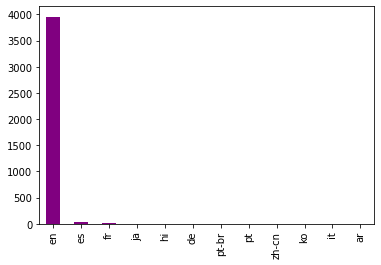

In [74]:
#The distribution:

data['native_lang'].value_counts().plot(kind='bar',color='purple')

Around 3950 are available in English and around only 50 in other languages. This will not result in any difference in the views because of the 5% difference and mostly is a homogenous column.

I will therefore drop this to not further increase the complexity.

In [75]:
data.drop(columns='native_lang',inplace= True)

## Event:

In [76]:
data['event'][0]

'TED2006'

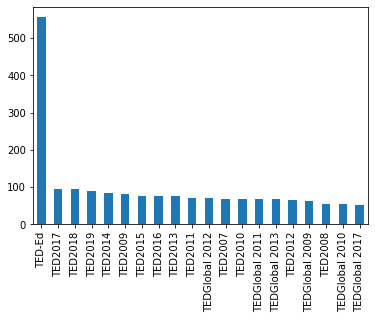

In [77]:
data['event'].value_counts().sort_values(ascending= False).head(20).plot(kind= 'bar')

The Ted-Ed  being the one with the highest medium gives us a idea that knowledge sharing and academics is a very popular kind of medium.

## Frequency Encoding-

In [78]:
enc_nom_1 = (data.groupby('event').size()) / len(data)

data['event_encode'] = data['event'].apply(lambda x : enc_nom_1[x])

In [79]:
data.drop(columns= 'event',inplace =True)

## Number of Speakers:

 This column will help retain the speakers :

In [80]:
data['all_speakers'][0]

"{0: 'Al Gore'}"

Function for converting:

In [81]:
#This function converts string to dict:
def convert_string_to_dict(x):
  if x== 'Unknown':
    pass
  else:
    return eval(x)

In [82]:
data['all_speakers']=data['all_speakers'].apply(convert_string_to_dict)

In [83]:
data['all_speakers'][0]

{0: 'Al Gore'}

Next I want to get speakers in a series format and not in a dictionary format. And the count of speakers in each talk.

In [84]:
len(data['all_speakers'][0])

1

In [85]:
#function to obtain the count of speakers

def get_count_speakers(x):
  try:
    return len(x)
  except TypeError:
    return 0


In [86]:
data['count_of_speakers']= data['all_speakers'].apply(get_count_speakers)

Text(0.5, 1.0, 'Count of Speakers')

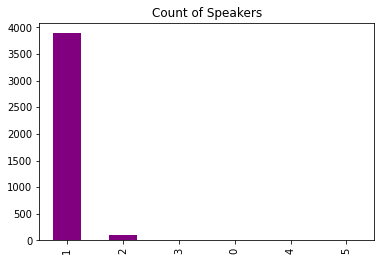

In [87]:
data['count_of_speakers'].value_counts().plot(kind='bar',color='purple')

plt.title('Count of Speakers')

Except a few, most have 1 speaker in the talks.

In [88]:
#function to get a separate column for the speakers only

def get_speakers(x):
  speakers=[]
  try:
    for key,value in x.items():
      speakers.append(value)
  except AttributeError:
    speakers.append('Unknown')
  return speakers


In [89]:
data['Speakers']= data['all_speakers'].apply(get_speakers)

Let us see who are the speakers :

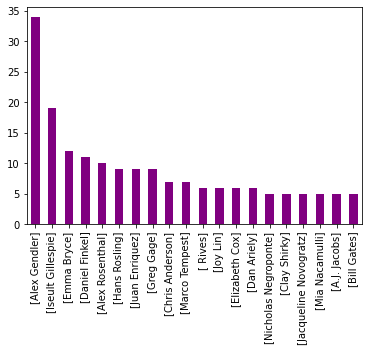

In [90]:
data['Speakers'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color='purple')

Comparing views with number of speakers:

In [91]:
data['count_of_speakers'] = MinMaxScaler().fit_transform(np.array(data['count_of_speakers']).reshape(-1,1))

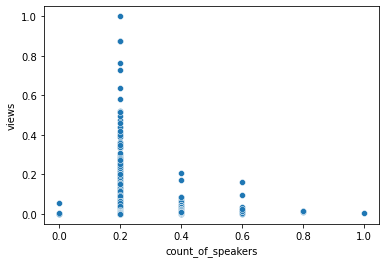

In [92]:
sns.scatterplot(x= data['count_of_speakers'], y=data['views'])

Since the number of speakers is not at all related to views.

We can infer from here that, one speaker is enough for views if he popular enough and not needed for two speakers

As Speakers_1 is very similar to all_Speakers

In [93]:
data.drop(columns=['all_speakers','count_of_speakers','Speakers'],inplace= True)

## Speaker 1:

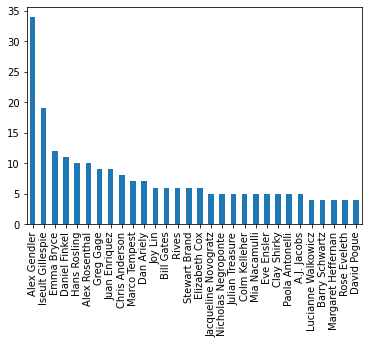

In [94]:
data['speaker_1'].value_counts().sort_values(ascending= False).head(30).plot(kind='bar')

## Encoding by Frequency Encoding:

In [95]:
enc_nom_1 = (data.groupby('speaker_1').size()) / len(data)


In [96]:
data['speaker_1_encode'] = data['speaker_1'].apply(lambda x : enc_nom_1[x])

## Dropping the speaker 1 feature then:

In [97]:
data.drop(columns='speaker_1',inplace= True)

## Occupation:

In [98]:
data['occupations'][0]

"{0: ['climate advocate']}"

In [99]:
data['occupations']=data['occupations'].apply(convert_string_to_dict)

In [100]:
#Function to convert list to string
def list_to_string(x):
  for item in x:
    return item

In [101]:
#Function to obtain occupation 

def get_occupation(x):
  try:
    for key,value in x.items():
      return value
  except AttributeError:
    return 'Unknown'



In [102]:
data['occupation']= data['occupations'].apply(get_occupation)

In [103]:
data['occupation'][0]

['climate advocate']

In [104]:
data['occupation']= data['occupation'].apply(list_to_string)

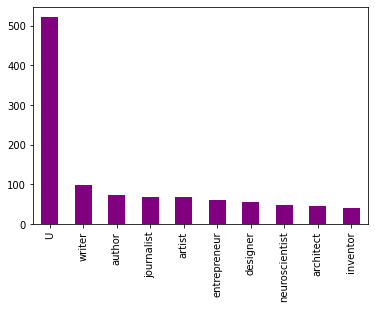

In [105]:
#Plot the occupations plot

data['occupation'].value_counts().head(10).plot(kind='bar',color= 'purple')

A lot of these values are given as 'U'. Let me understand these values first.

In [106]:
data[data['occupation']=='U'].head(3)

,title,occupations,about_speakers,views,comments,duration,topics,related_talks,description,transcript,published_year,recorded_year,diff_record_publish,age_of_video,published_day_encode,published_month_encode,recorded_day_encode,recorded_month_encode,count_available_lang,event_encode,speaker_1_encode,occupation
1142,I am a pirate,None,"{0: 'Rick Falkvinge, didn’t plan on becoming a...",0.003390,0.019848,0.268514,"['Internet', 'TEDx', 'global issues', 'politic...","{1329: 'Why SOPA is a bad idea', 871: 'Re-exam...","The Pirate Party fights for transparency, anon...",Thank y'all! This is going to be a motivationa...,2012,2013,0.000000,9,0.013733,0.105618,0.212484,0.081648,16,0.001498,0.00025,U
1170,Tracking our online trackers,None,{0: 'Gary Kovacs is a technologist and the for...,0.034221,0.040316,0.087778,"['Internet', 'advertising', 'business', 'priva...","{1370: 'All your devices can be hacked', 788: ...","As you surf the Web, information is being coll...","I don't know why, but I'm continually amazed t...",2012,2012,0.068429,9,0.207740,0.077903,0.181273,0.164544,32,0.016230,0.00025,U
1241,Image recognition that triggers augmented reality,None,"{0: 'Matt Mills comes from Aurasma, a startup ...",0.041165,0.021709,0.109788,"['demo', 'design', 'interface design', 'scienc...","{481: 'Meet the SixthSense interaction', 1411:...",Matt Mills and Tamara Roukaerts demonstrate Au...,So wouldn't it be amazing if our phones could ...,2012,2012,0.064059,9,0.207740,0.069413,0.175031,0.092385,26,0.017478,0.00025,U


Most of the U values are given for None type occupations. I will be changing them to not available.

In [107]:
data['occupation']=data['occupation'].replace(['U'],'Not available')

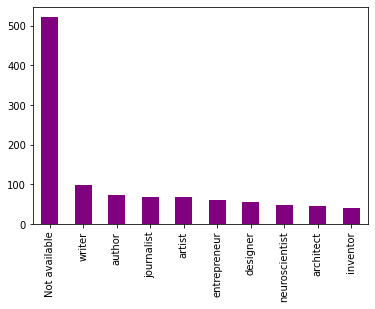

In [108]:
data['occupation'].value_counts().head(10).plot(kind='bar',color= 'purple')

In [109]:
data.drop(columns='occupations',inplace= True)

## Frequency encoding

In [110]:
enc_nom_1 = (data.groupby('occupation').size()) / len(data)

data['occupation_encode'] = data['occupation'].apply(lambda x : enc_nom_1[x])

In [111]:
data.drop(columns='occupation',inplace=True)

## Correlation between variables- 

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   4005 non-null   object 
 1   about_speakers          4005 non-null   object 
 2   views                   4005 non-null   float64
 3   comments                4005 non-null   float64
 4   duration                4005 non-null   float64
 5   topics                  4005 non-null   object 
 6   related_talks           4005 non-null   object 
 7   description             4005 non-null   object 
 8   transcript              4005 non-null   object 
 9   published_year          4005 non-null   int64  
 10  recorded_year           4005 non-null   int64  
 11  diff_record_publish     4005 non-null   float64
 12  age_of_video            4005 non-null   int64  
 13  published_day_encode    4005 non-null   float64
 14  published_month_encode  4005 non-null   

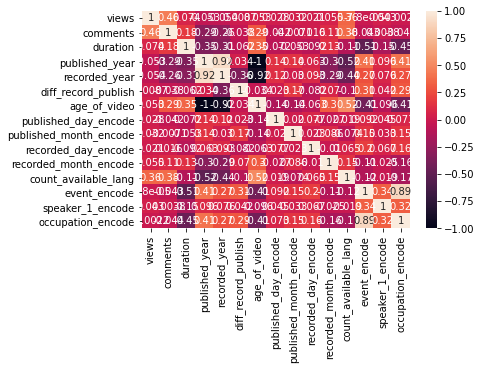

In [113]:
sns.heatmap(data.corr(),annot= True)

## We can remove occupation and event:

1. They are highly correlated to each other

2. Not much relationship with the views.

In [114]:
data.drop(columns=['event_encode','occupation_encode'],inplace= True)

## Remove published and recorded year due to following reasons:

1. Very highly correlated to one another and closely to some other variables.

2. Not much relationship with views.

In [115]:
data.drop(columns=['published_year','recorded_year'],inplace= True)

# Let us visualize the most spoken about topics in the Ted talks :

In [116]:
from wordcloud import WordCloud,ImageColorGenerator

In [117]:
text = " ".join(topic for topic in data.topics.astype(str))

In [118]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

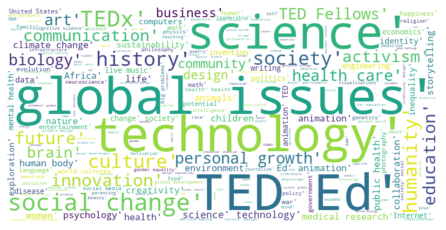

In [119]:
plt.axis("off")

plt.rcParams["figure.figsize"] = (15,10)

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation='bilinear')

plt.savefig('gdrive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/topics_cloud.png', dpi=300, bbox_inches='tight')

plt.show()

## There are two ways I am going to use topics column- 

1. Count the number of tags and make it into one feature

2. Segreagte the data according to different clusters by the most count of topics the talks were tagged in.

In [120]:
#Raise the important top  topics first:

def define_topics(x):
  if 'TED Ed' in x:
    return 'TED Ed'
  elif 'global issues' in x:
    return 'global issues'
  elif 'technology' in x:
    return 'technology'
  elif 'science' in x:
    return 'science'
  elif 'social changes' in x:
    return 'social changes'
  elif 'communication' in x:
    return 'communication'
  elif 'business' in x:
    return 'business'
  elif 'history' in x:
    return 'history'
  elif 'art' in x:
    return 'art'
  else:
    return 'others'

In [121]:
data['topic_cluster']= data['topics'].apply(define_topics)

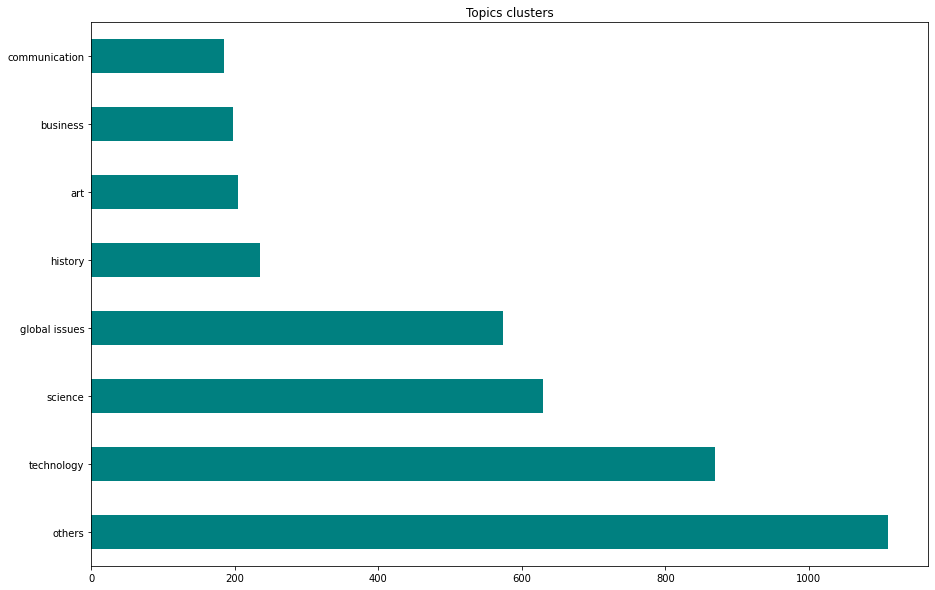

In [122]:
data['topic_cluster'].value_counts().sort_values(ascending=False).plot(kind= 'barh',color= 'teal')

plt.title('Topics clusters')

plt.rcParams["figure.figsize"] = (10,7)

plt.savefig('gdrive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/topicscluster.png', dpi=300, bbox_inches='tight')

In [123]:
#Find the number of tags

def no_of_tags(x):
  return len(x)

In [124]:
data['Num_tags']= data['topics'].apply(no_of_tags)

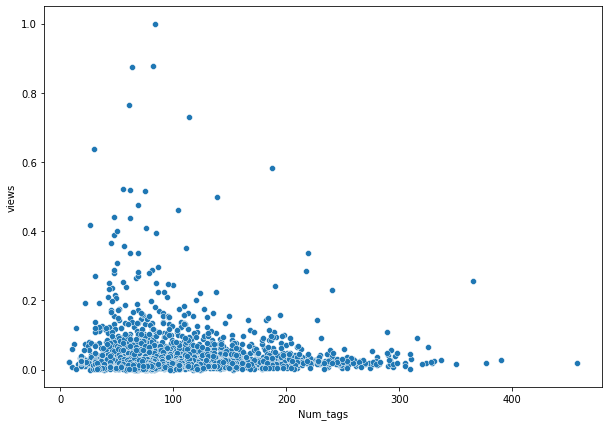

In [125]:
sns.scatterplot(x= data['Num_tags'],y= data['views'])

# Feature selection by f-regression:

This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

This can only be used for numerical features and not string data.

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   4005 non-null   object 
 1   about_speakers          4005 non-null   object 
 2   views                   4005 non-null   float64
 3   comments                4005 non-null   float64
 4   duration                4005 non-null   float64
 5   topics                  4005 non-null   object 
 6   related_talks           4005 non-null   object 
 7   description             4005 non-null   object 
 8   transcript              4005 non-null   object 
 9   diff_record_publish     4005 non-null   float64
 10  age_of_video            4005 non-null   int64  
 11  published_day_encode    4005 non-null   float64
 12  published_month_encode  4005 non-null   float64
 13  recorded_day_encode     4005 non-null   float64
 14  recorded_month_encode   4005 non-null   

In [127]:
data['duration']= data['duration'].astype('float64')

In [128]:
data.columns

Index(['title', 'about_speakers', 'views', 'comments', 'duration', 'topics',
       'related_talks', 'description', 'transcript', 'diff_record_publish',
       'age_of_video', 'published_day_encode', 'published_month_encode',
       'recorded_day_encode', 'recorded_month_encode', 'count_available_lang',
       'speaker_1_encode', 'topic_cluster', 'Num_tags'],
      dtype='object')

In [129]:
num_var=['comments','duration','diff_record_publish','age_of_video','published_day_encode','published_month_encode','recorded_day_encode','recorded_month_encode',
         'count_available_lang','speaker_1_encode','Num_tags']

In [130]:
numerical_features= data[num_var]

In [131]:
dependent_variable= data['views']

In [132]:
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [133]:
f_scores = f_regression(numerical_features, dependent_variable)
f_scores

(array([1.07911409e+03, 2.18272996e+01, 3.05441040e-01, 1.14808807e+01,
        3.06720513e+00, 4.03933630e+00, 1.79196337e+00, 1.20762744e+01,
        5.79875934e+02, 7.50898027e+00, 2.41993758e+00]),
 array([9.19769042e-210, 3.08124671e-006, 5.80522172e-001, 7.09949633e-004,
        7.99632884e-002, 4.45182805e-002, 1.80763148e-001, 5.16096255e-004,
        9.03081853e-120, 6.16644214e-003, 1.19878756e-001]))

In [134]:
#The second array consists of p-values that we need

p_values= pd.Series(f_scores[1],index= numerical_features.columns)

Text(0.5, 1.0, 'P-value scores for numerical features')

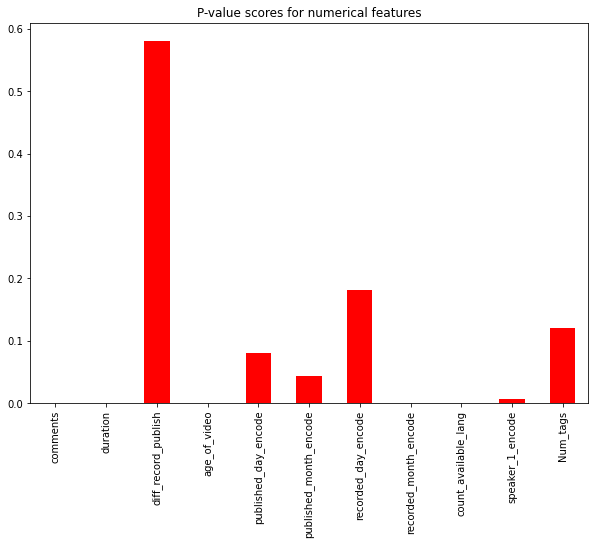

In [135]:
p_values.plot(kind='bar',color='red')

plt.title('P-value scores for numerical features')

Remove the diff_record_publish column for high p values.

In [136]:
numerical_features.drop(columns='diff_record_publish',inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [137]:
X= numerical_features

Y= dependent_variable

In [138]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [139]:
#Scaling the data first:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Checking in a simple XGBoost Baseline model with hyper paramater tuning first:

In [140]:
from xgboost import XGBRegressor

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
#XGBoost Regressor

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)


xgb_random.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[06:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.3s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[06:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[06:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[06:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.2s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4 
[06:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=50, max_depth=4, total=   0.1s
[CV] n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[06:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   0.3s
[CV] n_es

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [143]:
#The best esitmators
xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, min_samples_leaf=50,
             min_samples_split=50, missing=None, n_estimators=80, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [144]:
#Building optimal model on the best estimators
xgb_optimal_model = xgb_random.best_estimator_

In [145]:
# make predictions for test data
y_hat = xgb_optimal_model.predict(X_test)

In [146]:
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')

r_sqr value for train: 0.8156982786036071


Scores:

In [147]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [148]:
r_squared= r2_score(y_test,y_hat)

In [149]:
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f'The R_Squared for XGBoost is {r_squared} for train and adjusted R_Squared is {adjusted_r_squared}')


The R_Squared for XGBoost is 0.30023175524252044 for train and adjusted R_Squared is 0.29847970655759937


In [150]:
mse= mean_squared_error(y_test,y_hat)

In [151]:
import math

In [180]:
rmse=[]

mae= []

model=[]

In [181]:
rmse.append(math.sqrt(mse))

In [153]:
print(f'The Root Mean Squared Error for XGBoost is: {math.sqrt(mse)}')

The Root Mean Squared Error for XGBoost is: 0.040105659659666844


In [182]:
mae.append(mean_absolute_error(y_test,y_hat))

In [155]:
print(f'The mean absolute error for XGBoost is: {mae}')

The mean absolute error for XGBoost is: 0.016782571555757523


In [183]:
model.append('XGBoost')

## By Statsmodel Regression:

In [156]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [157]:
ks2 = sm.OLS(Y, X)
ks2_res = ks2.fit()
ks2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  views   R-squared (uncentered):                   0.501
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                              401.4
Date:                Thu, 20 May 2021   Prob (F-statistic):                        0.00
Time:                        06:40:16   Log-Likelihood:                          6815.1
No. Observations:                4005   AIC:                                 -1.361e+04
Df Residuals:                    3995   BIC:                                 -1.355e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
comments                   0.5151      0.020     25.428      0.000       0.475       0.555
duration                   0.0882      0.009     10.060      0.000       0.071       0.105
age_of_video              -0.0045      0.000    -17.860      0.000      -0.005      -0.004
published_day_encode      -0.0565      0.019     -3.045      0.002      -0.093      -0.020
published_month_encode    -0.0564      0.040     -1.408      0.159      -0.135       0.022
recorded_day_encode       -0.0509      0.016     -3.207      0.001      -0.082      -0.020
recorded_month_encode      0.0357      0.019      1.865      0.062      -0.002       0.073
count_available_lang       0.0023      0.000     22.041      0.000       0.002       0.002
speaker_1_encode           2.4834      0.807      3.079      0.002       0.902       4.065
Num_tags               -3.498e-05   1.38e-05     -2.529      0.011   -6.21e-05   -7.87e-06
==============================================================================
Omnibus:                     4801.798   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1017439.357
Skew:                           6.128   Prob(JB):                         0.00
Kurtosis:                      80.115   Cond. No.                     1.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I think from the Q-Q plot I can infer that R-squared is very low as there is a presence of outliers. Which can clearly be seen even from the residual graph. 

It follows a normal distribution for around 50% of the data but in the top and bottom there are too many outliers.

Unexplained variance and noise is preventing the good r_square scores.

# Random Forest:

In [160]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

In [161]:
#Random Forest Regressor

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForest
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)


rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=   0.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.6s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   0.6s
[CV] n_estimators=100, min_samples_sp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [162]:
#The best esitmators
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=40,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [163]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

In [164]:
# make predictions for test data
y_hat_r = rf_optimal_model.predict(X_test)

In [165]:
r_squared_rf=r2_score(y_test,y_hat_r)

In [166]:
#Calculate Adjusted R-sqaured
adjusted_r_squared_rf = 1 - (1-r_squared_rf)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(f'The R_Squared for Random Forest is {r_squared_rf} and adjusted R_Squared is {adjusted_r_squared_rf}')

The R_Squared for Random Forest is 0.2969069843909826 and adjusted R_Squared is 0.295146611292312


In [184]:
rmse.append (math.sqrt(mean_squared_error(y_test,y_hat_r)))

In [168]:
print(f'The Root Mean Squared Error for Random Forest is: {math.sqrt(mean_squared_error(y_test,y_hat_r))}')

The Root Mean Squared Error for Random Forest is: 0.04020082267904027


In [185]:
mae.append(mean_absolute_error(y_test,y_hat_r))

In [170]:
print(f'The mean absolute error for Random Forest is: {mean_absolute_error(y_test,y_hat_r)}')

The mean absolute error for Random Forest is: 0.01818246043559954


In [186]:
model.append('Random Forest')

## Linear Regression :

1.Assumption 1: No multicolinearity between independent variables.

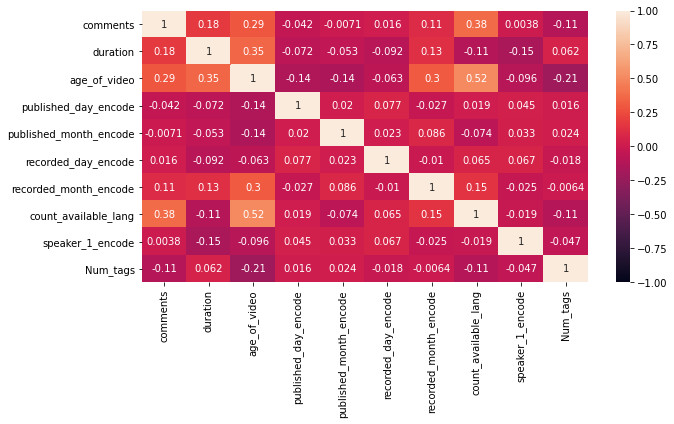

In [188]:
#Check for assumptions
plt.figure(figsize=(10,5))

sns.heatmap(X.corr(),vmin=-1,annot= True)

In [190]:
x= X.values

In [192]:
# For each X, calculate VIF and save in dataframe

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(x.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,1.7,comments
1,6.1,duration
2,7.4,age_of_video
3,26.7,published_day_encode
4,25.0,published_month_encode
5,14.3,recorded_day_encode
6,9.0,recorded_month_encode
7,15.5,count_available_lang
8,1.4,speaker_1_encode
9,5.0,Num_tags


There is moderate relationship between variables.

2. Errors are normally distributed

In [158]:
from scipy import stats

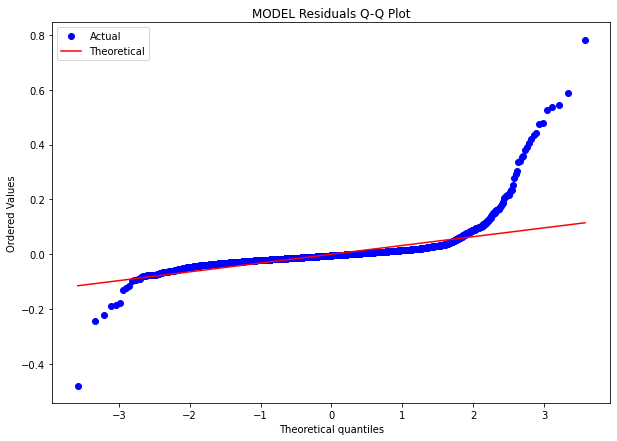

In [159]:
stats.probplot(ks2_res.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

There is fluctuation in predicted and actual values of y which led to this assumption mostly true but with some outliers.

3. Linearity with dependent variable:

In [197]:
sns.set(style="ticks", color_codes=True)

In [199]:
X.columns

Index(['comments', 'duration', 'age_of_video', 'published_day_encode',
       'published_month_encode', 'recorded_day_encode',
       'recorded_month_encode', 'count_available_lang', 'speaker_1_encode',
       'Num_tags'],
      dtype='object')

Text(0.5, 1.0, 'Comments')

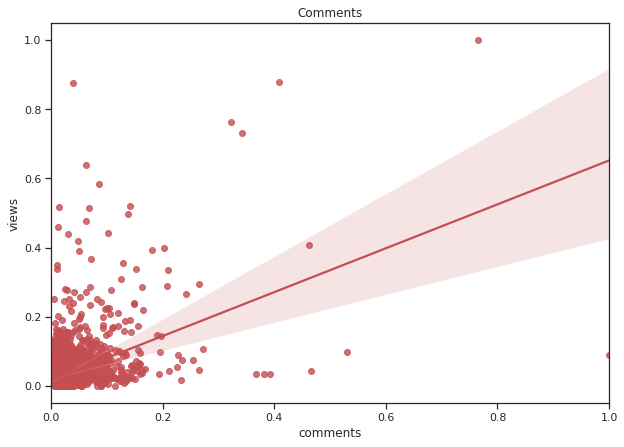

In [210]:
p=sns.regplot(x='comments',y='views',data=data,color='r')
plt.title('Comments')

Text(0.5, 1.0, 'Duration')

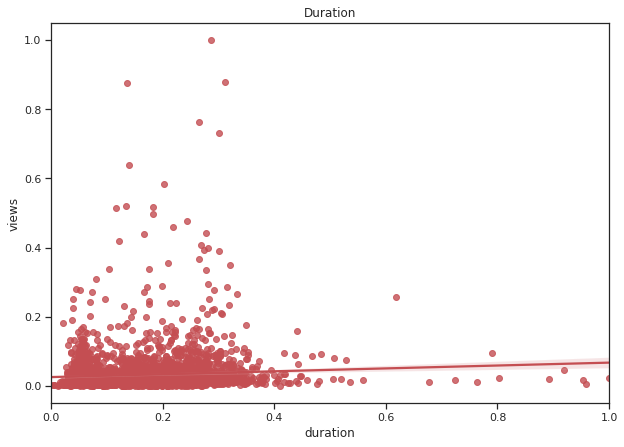

In [211]:
p=sns.regplot(x='duration',y='views',data=data,color='r')
plt.title('Duration')

Text(0.5, 1.0, 'Age of Video')

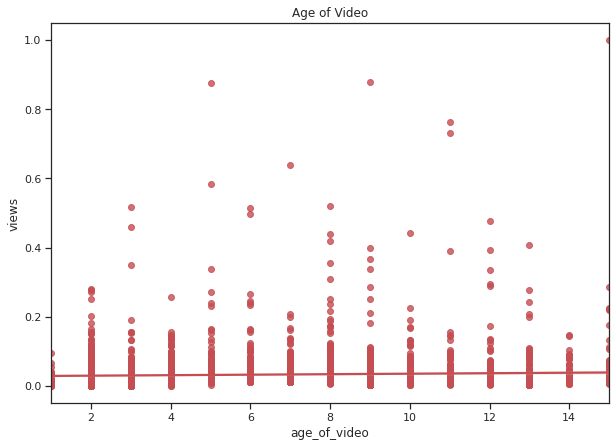

In [209]:
p=sns.regplot(x='age_of_video',y='views',data=data,color='r')
plt.title('Age of Video')

Text(0.5, 1.0, 'Published Month')

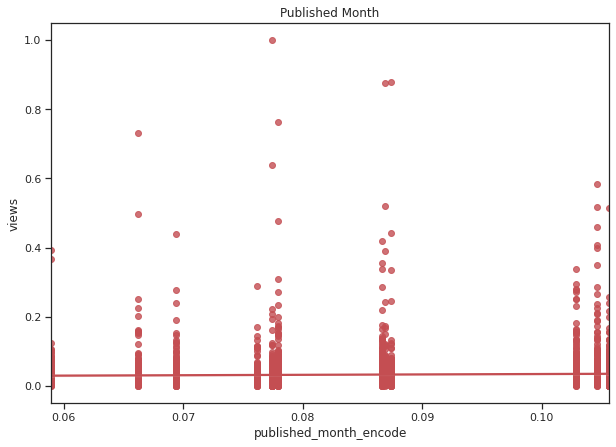

In [208]:
p=sns.regplot(x='published_month_encode',y='views',data=data,color='r')
plt.title('Published Month')

Text(0.5, 1.0, 'Recorded Month')

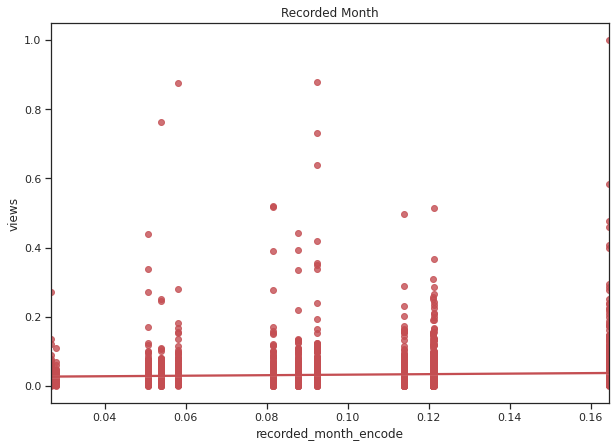

In [207]:
p=sns.regplot(x='recorded_month_encode',y='views',data=data,color='r')
plt.title('Recorded Month')

Text(0.5, 1.0, 'No of available languages')

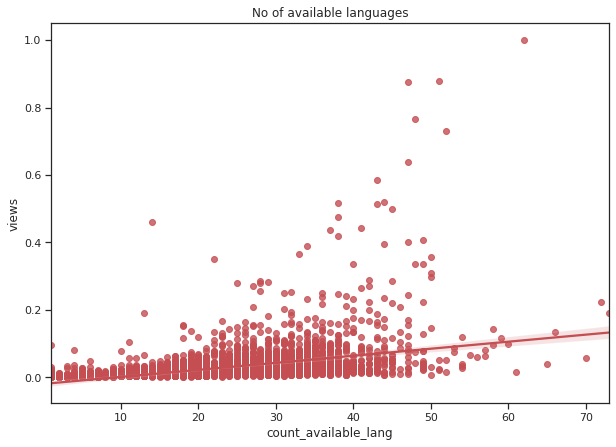

In [206]:
p=sns.regplot(x='count_available_lang',y='views',data=data,color='r')
plt.title('No of available languages')

Text(0.5, 1.0, 'Speaker One')

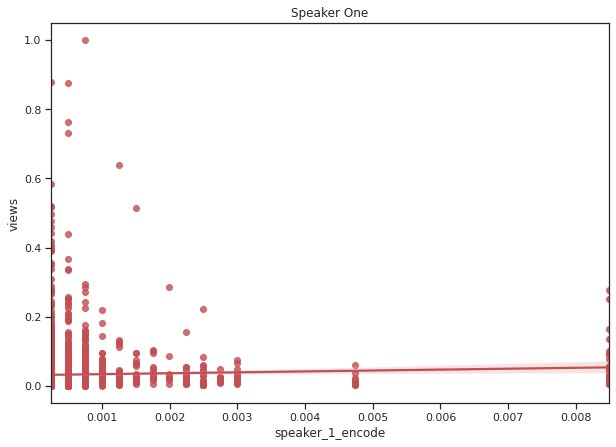

In [205]:
p=sns.regplot(x='speaker_1_encode',y='views',data=data,color='r')
plt.title('Speaker One')

Text(0.5, 1.0, 'Number of tags')

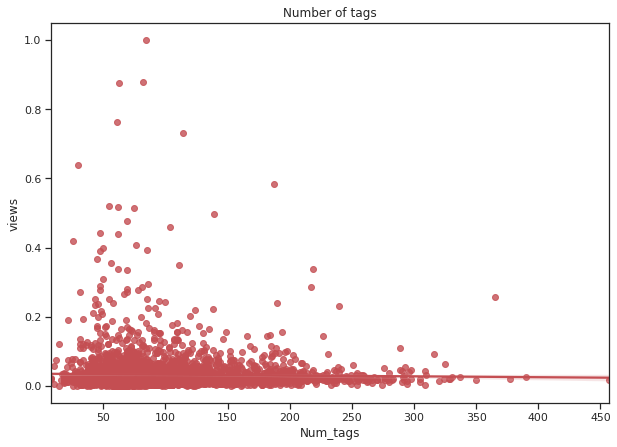

In [204]:
p=sns.regplot(x='Num_tags',y='views',data=data,color='r')
plt.title('Number of tags')

Only duration has a similar linear relationship with the dependent variable.

## Linear Regression:

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [217]:
rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))

In [227]:
print(f'The Root Mean Squared Error for Linear Regression  is: {math.sqrt(mean_squared_error(y_test,y_pred))}')

The Root Mean Squared Error for Linear Regression  is: 0.04134518575462551


In [221]:
mae.pop()

0.14384782297845627

In [223]:
mae.append(mean_absolute_error(y_test, y_pred))

In [226]:
print(f'The Mean Absolute Error for Linear Regression is: {mean_squared_error(y_test,y_pred)}')

The Mean Absolute Error for Linear Regression is: 0.001709424385084488


In [228]:
model.append('Linear Regression')

## Comapring the results of each of the models:

### Creating a data frame for the same.

In [230]:
scores= pd.DataFrame({'MAE': mae, 'RMSE':rmse, 'Model':model})

In [231]:
scores

,MAE,RMSE,Model
0,0.016783,0.040106,XGBoost
1,0.018182,0.040201,Random Forest
2,0.020692,0.041345,Linear Regression


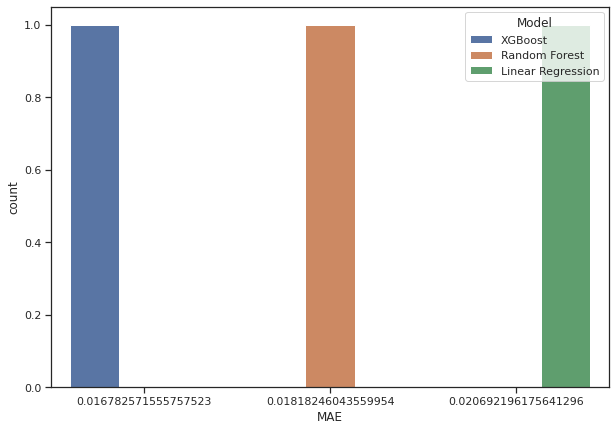

In [232]:
sns.countplot(x=scores['MAE'],hue=scores['Model'])

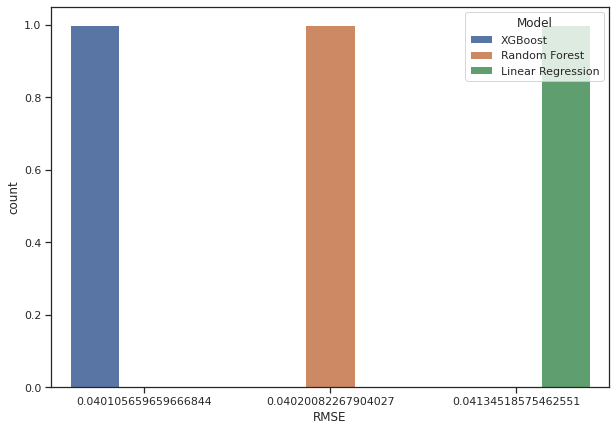

In [233]:
sns.countplot(x=scores['RMSE'],hue=scores['Model'])

Mos